# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
%tensorflow_version 1.x

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


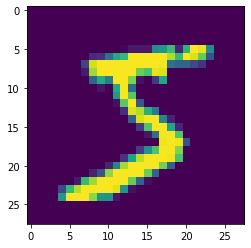

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Convolution2D(32,1,1, activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
# model.add(Convolution2D(128,3,3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 9))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        4128      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 10)         

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 39s 644us/step - loss: 0.1495 - acc: 0.9538
Epoch 2/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.0550 - acc: 0.9829
Epoch 3/10
60000/60000 [==============================] - 30s 508us/step - loss: 0.0411 - acc: 0.9871
Epoch 4/10
60000/60000 [==============================] - 30s 507us/step - loss: 0.0330 - acc: 0.9899
Epoch 5/10
60000/60000 [==============================] - 30s 506us/step - loss: 0.0273 - acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 30s 502us/step - loss: 0.0225 - acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 30s 506us/step - loss: 0.0196 - acc: 0.9935
Epoch 8/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.0155 - acc: 0.9947
Epoch 9/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.0150 - acc: 0.9950
Epoch 10/10
60000/60000 [==============================] - 30s 504us/step -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.03342232405357299, 0.9912]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[5.5745529e-15 1.1346563e-18 4.3512843e-10 5.7274767e-12 1.0592097e-20
  1.7996977e-17 6.3509977e-26 1.0000000e+00 1.5176142e-14 3.2674400e-13]
 [1.3864162e-13 1.8765460e-11 1.0000000e+00 1.3202292e-15 2.4492306e-13
  1.4854891e-23 1.6080532e-13 5.2999525e-15 1.3049539e-13 3.2742225e-16]
 [2.3431418e-11 9.9999678e-01 9.6942765e-09 7.2256450e-12 2.9655323e-06
  1.6426636e-08 6.4688843e-10 2.6927430e-07 3.9672116e-08 5.7167326e-11]
 [9.9999893e-01 3.8901874e-17 3.8836032e-10 6.4703417e-14 1.9755635e-15
  7.0952660e-11 1.0295777e-06 2.7108378e-12 2.1010442e-11 3.0702017e-11]
 [8.2370487e-16 1.5681856e-14 2.9950746e-16 2.6082651e-18 1.0000000e+00
  3.7721413e-18 2.6526589e-16 2.1345899e-14 5.9387492e-14 2.1863634e-08]
 [4.0915642e-11 9.9999750e-01 3.3705246e-07 5.4453928e-12 8.1897781e-07
  5.1882190e-11 9.2717189e-10 1.3399090e-06 7.5042470e-09 5.1210759e-12]
 [3.4597087e-17 1.3361526e-11 6.9710682e-10 7.8584159e-16 9.9940240e-01
  2.3162654e-10 2.7922640e-15 5.0233423e-10 5.7302217e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

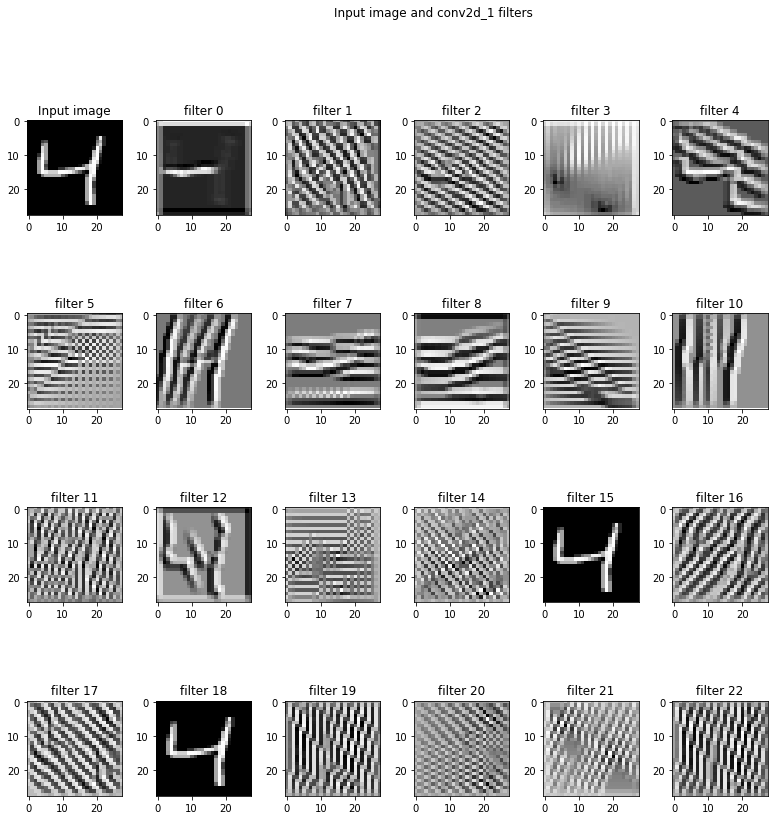

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()